 # Assignment 34 - Stiff Equations
 
 

## Targeted Theory Refresher

A **second - order linear ordinary differential equation with constant coefficients and zero right hand side** is an ode of the following form:

$$a_{2}\frac{d^{2}x}{dt^{2}} + a_{1}\frac{dx}{dt} + a_{0}x = 0$$

We can write $$D_{t} = \frac{d}{dt}$$, 

which expresses the derivative as an *operator*, and allows us to rewrite the above ode in the form:

$$D^{2}_{t}x + \alpha_{1}D_{t}x + \alpha_{0}x = 0$$

where $\alpha_{1} = \frac{a_{1}}{a_{2}}$ and $\alpha_{0} = \frac{a_{0}}{a_{2}}$.

We can factor out the function $x(t)$ here, and express the above as:

$$(D^{2}_{t} + \alpha_{1}D_{t} + \alpha_{0})x = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ (*)$$

In order for the above to have a solution other than the trivial solution (wherein $x(t)$ is identically equal to $0$ for all $t$ for which $x$ is defined), we thus need to have 

$$(D^{2}_{t} + \alpha_{1}D_{t} + \alpha_{0}) = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (**)$$

Now, if the the above factors, then it will factor as 

$$(D_{t} + \kappa_{1})(D_{t} + \kappa_{2}) = 0$$

where $\kappa_{1} + \kappa_{2} = \alpha_{1}$ and $\kappa_{1} \cdot \kappa_{2} = \alpha_{0}$

Now, suppose that $(D_{t} + \kappa_{1}) = 0$. Then $(D_{t} + \kappa_{1})x = 0$ is **seperable**:

$$(D_{t} + \kappa_{1})x = 0 \implies x'(t) = -\kappa_{1}x(t) $$

Clearly, a (general) solution to the above ode is to let:

$$x_{1}(t) = C_{1}\exp(-\kappa_{1}t)$$

Analogously, we have it that the remaining factor, $(D_{t} + \kappa_{2})$, gives rise to a separable ode with solution:

$$x_{2}(t) = C_{2}\exp(-\kappa_{2}t)$$

Obeserve that *both* $x_{1}(t)$ and $x_{2}(t)$ are solutions to $(*)$, and that the factors $\kappa_{1}, \kappa_{2}$ occurring in the equations for $x_{1}$ and $x_{2}$ are the roots of $(**)$, which we refer to as the *auxiliary* or *characteristic* equation for $(*)$. Moreover, since each of $x_{1}$ and $x_{2}$ is a solution to $(*)$ with it's own undetermined constant, the **general solution** to $(*)$ is given by their sum: 

$$x(t) = x_{1}(t) + x_{2}(t) = C_{1}\exp(-\kappa_{1}t) + C_{2}\exp(-\kappa_{2}t)$$

### Assignment 33 problem statement

We have the second order linear differential equation: 

$$\frac{d^{2}x}{dt^{2}} + (1 - \epsilon)\frac{dx}{dt} - \epsilon x = 0$$

with characteristic equation given by:

$$d^{2} + (1 - \epsilon)d + \epsilon = 0$$

and corresponding roots given by: 

$$d_{1} = -1, d_{2} = \epsilon$$

The solution for initial conditions $x(0) = 2$ and $x'(0) = (\epsilon - 1)$ is given by:

$$x(t) = e^{\epsilon t} + e^{-t}$$

Below, we plot the exact solution for an interval $I$, the approximate numerical solution obtained by Runge-Kutta, and the relative error between the two for $\epsilon = 0.01$ . 


                         exact solution


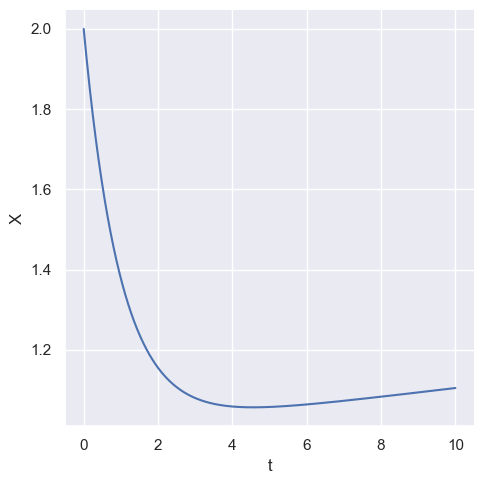

In [1]:
# jupyter nbconvert --to webpdf assignment34.ipynb
from copy import deepcopy
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
from tabulate import tabulate

def exact_sol(t, eps=0.01):
    return math.exp(eps*t) + math.exp(-t)

t = np.linspace(0, 10, 500)
X = [exact_sol(t) for t in t]


print("\n                         exact solution")
fig0 = sns.relplot(data=pd.DataFrame(list(zip(t, X)), columns=["t", "X"]), x="t", y="X", kind="line")
plt.show()
plt.close()

Below, we define the compenent steps of Runge-Kutta:

$$\mathbf{k_{1}}_{n + 1} = \Delta t \mathbf{f}(t_{n}, \mathbf{x_{n}})$$

$$\mathbf{k_{2}}_{n + 1} = \Delta t \mathbf{f}(t_{n} + \frac{1}{2}\Delta t, \mathbf{x_{n}} + \frac{1}{2}\mathbf{k_{1}}_{n})$$

$$\mathbf{k_{3}}_{n + 1} = \Delta t \mathbf{f}(t_{n} + \frac{1}{2}\Delta t, \mathbf{x_{n}} + \frac{1}{2}\mathbf{k_{2}}_{n})$$

$$\mathbf{k_{4}}_{n + 1} = \Delta t \mathbf{f}(t_{n} + \Delta t, \mathbf{x_{n}} + \mathbf{k_{3}}_{n})$$

$$\mathbf{x}_{n + 1} = \mathbf{x}_{n} + \frac{1}{6}(\mathbf{k_{1}}_{n} + 2\mathbf{k_{2}}_{n} + 2\mathbf{k_{3}}_{n} + \mathbf{k_{4}}_{n})$$


                         runge-kutta


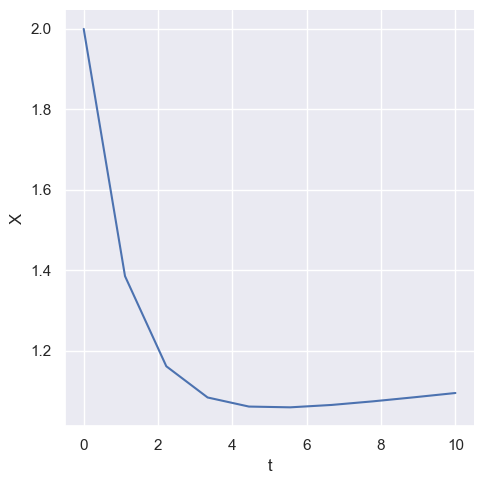

In [2]:
def k(h: float, f: float) -> float:
    return h * f


def runge_kutta(k1, k2, k3, k4):
    return (1.0 / 6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)


f1 = lambda y: y[1]
f2 = lambda y: (-0.99 * y[1]) + (0.01 * y[0])

F = [f1, f2]


def solve_runge_kutta(ti: float, tf: float, intrvls: int, X0: list, F: list) -> list:
    h = (tf - ti) / intrvls
    X = [deepcopy(X0) for i in range(intrvls)]
    for t in range(1, intrvls):
        x = np.array(X[t - 1])
        k1 = np.array([k(h, F[i](x)) for i in range(x.size)])
        k2 = np.array([k(h, F[i](x + 0.5 * k1)) for i in range(len(X0))])
        k3 = np.array([k(h, F[i](x + 0.5 * k2)) for i in range(len(X0))])
        k4 = np.array([k(h, F[i](x + k3)) for i in range(len(X0))])
        for i in range(len(X0)):
            X[t][i] = X[t - 1][i] + runge_kutta(k1[i], k2[i], k3[i], k4[i])
    y1 = [X[i][0] for i in range(len(X))]
    t = np.linspace(0, 10, intrvls)

    return list(zip(t, y1))


table1 = solve_runge_kutta(0, 10, 10, [2, -0.99], F)

print("\n                         runge-kutta")
fig1 = sns.relplot(data=pd.DataFrame(table1, columns=["t", "X"]), x="t", y="X", kind="line")
plt.show()
plt.close()

The first issue we would face in trying to apply runge-kutta as implemented above to the ode as written above, is that the ode - as written - doesn't quite have the required form. Recall that that form is given by:

$$\mathbf{x'} \equiv \frac{d\mathbf{x}}{dt} = \mathbf{f}(t, \mathbf{x}(t))$$

The above is clearly of the first order, though $\mathbf{f}$ and $\mathbf{x}$ are both allowed to have arbitrarily many compoenents. 

To cast 

$$x'' + (1 - \epsilon)x' - \epsilon x = 0$$

in the above form, we first rewrite the above using the follwing identifications: 

$$y_{1} = x$$

$$y_{2} = x'$$

With these equivalencies, we have it that

$$\frac{dy_{1}}{dt} = y_{2} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (*)$$

and

$$\frac{dy_{2}}{dt} = f(t, y_{1}, y_{2}) \ \ \ \ \ (**)$$

with

$$y_{2}' = f(t, y_{1}, y_{2}) = (\epsilon - 1)y_{2} + + \epsilon y_{1}$$

We also have the following given initial conditions: 

$$ \epsilon = 0.01  $$

$$ x(0) = 2 $$

$$ x'(0) = \epsilon - 1 $$

To get a grip on the $2^{nd}$ order problem, let's first solve it use euler's method. What are the update rules for the two compentents of $\mathbf{y}$? 

For $(*)$ we have, 

$$y_{1_{n + 1}} = y_{1_{n}} + \Delta t y_{2_{n}}$$

$$y_{2_{n + 1}} = y_{2_{n}} + \Delta t[(\epsilon + 1)y_{2_{n}} + \epsilon y_{1_{n}}]$$


                  X vs P for tf - ti = pi/30


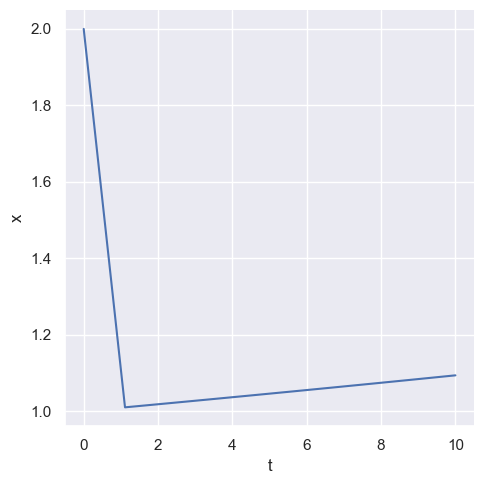

In [3]:
def k1(h: float, f: float) -> float:
    return h * f


f1 = lambda y: y[1]
f2 = lambda y: (-0.99 * y[1]) + (0.01 * y[0])

F = [f1, f2]


def solve_euler(ti: float, tf: float, intrvls: int, X0: list, F: list) -> list:
    """
    ti: initial time
    tf: final time
    intrvls: number of intervals into which tf - ti is divided
    X0: inital X values
    F: compenents of f(t, x)
    """
    h = (tf - ti) / intrvls
    X = [deepcopy(X0) for i in range(intrvls)]
    for t in range(1, intrvls):
        for i in range(len(X0)):
            X[t][i] = X[t - 1][i] + k1(h, F[i](X[t - 1]))
    y1 = [X[i][0] for i in range(len(X))]
    t = np.linspace(0, 10, intrvls)

    return list(zip(t, y1))


table2 = solve_euler(0, 10, 10, [2, -0.99], F)
print("\n                  X vs P for tf - ti = pi/30")
fig2 = sns.relplot(
    data=pd.DataFrame(table2, columns=["t", "x"]), x="t", y="x", kind="line"
)
plt.show()
plt.close()

Runge-Kutta clearly outperforms euler's method for ten steps. The curve we obtain from runge-kutta is a reasonably close appoximant to the curve we obtain by plotting the exact solution. The curve we obtain from euler's method, on the other hand, is a rather crude semblance of the exact solution curve. We can further explore the efficacy of runge-kutta by plotting the differences between the estimates it provides and the values coming from the exact solution: 


         runge-kutta estimates vs exact solution - fn of t


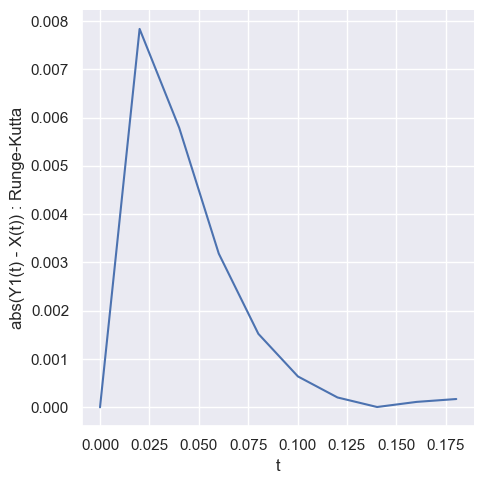


            runge-kutta estimates vs exact solution


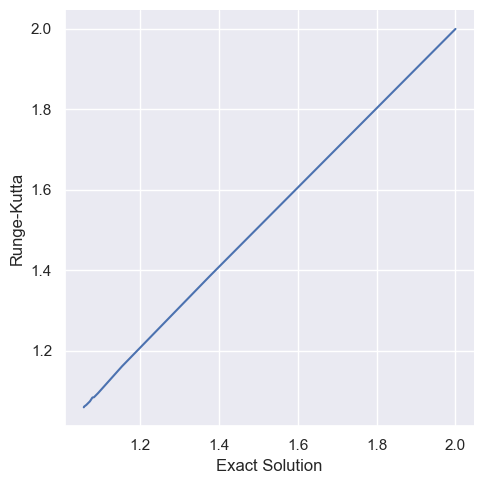

╒═════════════╤═══════════════╕
│   Exact Sol │   Runge-Kutta │
╞═════════════╪═══════════════╡
│     2       │       2       │
├─────────────┼───────────────┤
│     1.37721 │       1.38505 │
├─────────────┼───────────────┤
│     1.15504 │       1.16083 │
├─────────────┼───────────────┤
│     1.08001 │       1.08319 │
├─────────────┼───────────────┤
│     1.05906 │       1.06059 │
├─────────────┼───────────────┤
│     1.05805 │       1.05869 │
├─────────────┼───────────────┤
│     1.06441 │       1.06462 │
├─────────────┼───────────────┤
│     1.07356 │       1.07355 │
├─────────────┼───────────────┤
│     1.08379 │       1.08368 │
├─────────────┼───────────────┤
│     1.09449 │       1.09432 │
╘═════════════╧═══════════════╛

         euler estimates vs exact solution - fn of t


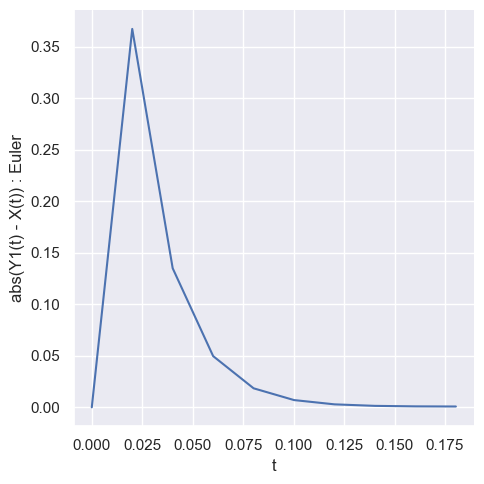


            euler estimates vs exact solution


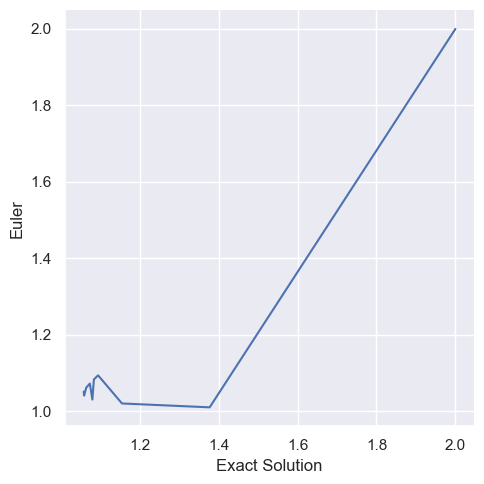

╒═════════════╤═════════╕
│   Exact Sol │   Euler │
╞═════════════╪═════════╡
│     2       │ 2       │
├─────────────┼─────────┤
│     1.37721 │ 1.01    │
├─────────────┼─────────┤
│     1.15504 │ 1.0201  │
├─────────────┼─────────┤
│     1.08001 │ 1.0303  │
├─────────────┼─────────┤
│     1.05906 │ 1.0406  │
├─────────────┼─────────┤
│     1.05805 │ 1.05101 │
├─────────────┼─────────┤
│     1.06441 │ 1.06152 │
├─────────────┼─────────┤
│     1.07356 │ 1.07214 │
├─────────────┼─────────┤
│     1.08379 │ 1.08286 │
├─────────────┼─────────┤
│     1.09449 │ 1.09369 │
╘═════════════╧═════════╛


In [4]:
diff = [abs(table1[i][1] - X[50 * i]) for i in range(len(table1))]
Y1RK = [table1[i][1] for i in range(len(table1))]
XX = [X[50 * i] for i in range(len(table1))]


print("\n         runge-kutta estimates vs exact solution - fn of t")
fig3 = sns.relplot(
    data=pd.DataFrame(list(zip(t, diff)), columns=["t", "abs(Y1(t) - X(t)) : Runge-Kutta"]),
    x="t",
    y="abs(Y1(t) - X(t)) : Runge-Kutta",
    kind="line",
)
plt.show()
plt.close()


print("\n            runge-kutta estimates vs exact solution")
fig4 = sns.relplot(
    data=pd.DataFrame(list(zip(XX, Y1RK)), columns=["Exact Solution", "Runge-Kutta"]),
    x="Exact Solution",
    y="Runge-Kutta",
    kind="line",
)
plt.show()
plt.close()


print(
    tabulate(
        list(zip(XX, Y1RK))[:20],
        headers=["Exact Sol", "Runge-Kutta"],
        tablefmt="fancy_grid",
    )
)



diff = [abs(table2[i][1] - X[50 * i]) for i in range(len(table2))]
Y1E = [table2[i][1] for i in range(len(table2))]
XX = [X[50 * i] for i in range(len(table2))]


print("\n         euler estimates vs exact solution - fn of t")
fig5 = sns.relplot(
    data=pd.DataFrame(list(zip(t, diff)), columns=["t", "abs(Y1(t) - X(t)) : Euler"]),
    x="t",
    y="abs(Y1(t) - X(t)) : Euler",
    kind="line",
)
plt.show()
plt.close()


print("\n            euler estimates vs exact solution")
fig6 = sns.relplot(
    data=pd.DataFrame(list(zip(XX, Y1E)), columns=["Exact Solution", "Euler"]),
    x="Exact Solution",
    y="Euler",
    kind="line",
)
plt.show()
plt.close()

print(
    tabulate(
        list(zip(XX, Y1E))[:20],
        headers=["Exact Sol", "Euler"],
        tablefmt="fancy_grid",
    )
)